# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -4 Brain Tumor Classification- Dataset

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17056282939959252530
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6676204092345572888
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [4]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [5]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [10]:
data = pd.DataFrame()
main_path = 'Training/'
name=[]


pa = 'Training'

entry = []
for filename in os.listdir(pa):
    entry.append(filename)
print(entry)
l=[]
for i in entry:
    name.append(os.listdir('Training/'+i))
    l.append(i)

len(name)

pn=[]
paths = []
classes = []
lab=[]
for i in range(len(name)):
    for j in name[i]:
        pn.append(j)
        paths.append(main_path+entry[i]+'/'+j)
        classes.append(entry[i])
        lab.append(i)

print(l)

print(len(name))
      
print(len(pn))

print(len(paths))

data['images_name']= pn


data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
4
2870
2870
2870


,images_name,classes,path
0,gg (1).jpg,glioma_tumor,Training/glioma_tumor/gg (1).jpg
1,gg (10).jpg,glioma_tumor,Training/glioma_tumor/gg (10).jpg
2,gg (100).jpg,glioma_tumor,Training/glioma_tumor/gg (100).jpg
3,gg (101).jpg,glioma_tumor,Training/glioma_tumor/gg (101).jpg
4,gg (102).jpg,glioma_tumor,Training/glioma_tumor/gg (102).jpg


In [11]:
li = data.classes.unique()

li=list(li)


In [12]:
li

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [13]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=128



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']


    image=cv2.imread(p)
#     print(image)
    image=Image.fromarray(image,'RGB')

    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))

    
    pic.append(image)
#     label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [14]:
dataset = im

print(type(im))
# print(type(label))

dataset=np.array(dataset)
# label=np.array(label)

print(type(dataset))
# print(type(label))

<class 'list'>
<class 'numpy.ndarray'>


<ipython-input-15-ad9a3bf570cb>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-15-ad9a3bf570cb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


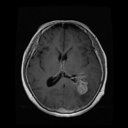

In [15]:
df['im_array']= im
# df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [16]:
df.shape

(2870, 5)

In [17]:
df['label']=lab
# label=df.classes
type(label)

list

In [18]:
label=df['label']

In [19]:
len(li)

4

In [20]:
df.head()

,images_name,classes,path,im_array,pic,label
0,gg (1).jpg,glioma_tumor,Training/glioma_tumor/gg (1).jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
1,gg (10).jpg,glioma_tumor,Training/glioma_tumor/gg (10).jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
2,gg (100).jpg,glioma_tumor,Training/glioma_tumor/gg (100).jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
3,gg (101).jpg,glioma_tumor,Training/glioma_tumor/gg (101).jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
4,gg (102).jpg,glioma_tumor,Training/glioma_tumor/gg (102).jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0


## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = len(li)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(2296, 128, 128, 3)
(2296,)


In [22]:
num_classes

4

## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [24]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [25]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 15 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [26]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

    
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)


    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 62)      1736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 62)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 62)       248       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 62)        34658     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 62)       0         
 2D)                                                             
                                                        

72/72 [==============================] - 18s 244ms/step - loss: 0.6092 - accuracy: 0.7605 - val_loss: 6.9570 - val_accuracy: 0.1324
Epoch 16/30
72/72 [==============================] - ETA: 0s - loss: 0.5944 - accuracy: 0.7631
Epoch 16: val_accuracy improved from 0.38850 to 0.44425, saving model to model_62_relu_max.hdf5
72/72 [==============================] - 19s 254ms/step - loss: 0.5944 - accuracy: 0.7631 - val_loss: 1.4230 - val_accuracy: 0.4443
Epoch 17/30
72/72 [==============================] - ETA: 0s - loss: 0.5757 - accuracy: 0.7696
Epoch 17: val_accuracy did not improve from 0.44425
72/72 [==============================] - 18s 244ms/step - loss: 0.5757 - accuracy: 0.7696 - val_loss: 2.0678 - val_accuracy: 0.3537
Epoch 18/30
72/72 [==============================] - ETA: 0s - loss: 0.5515 - accuracy: 0.7922
Epoch 18: val_accuracy did not improve from 0.44425
72/72 [==============================] - 18s 246ms/step - loss: 0.5515 - accuracy: 0.7922 - val_loss: 1.8120 - val_accu

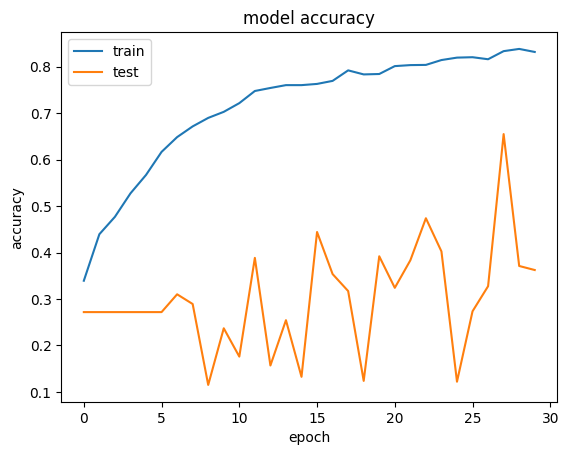

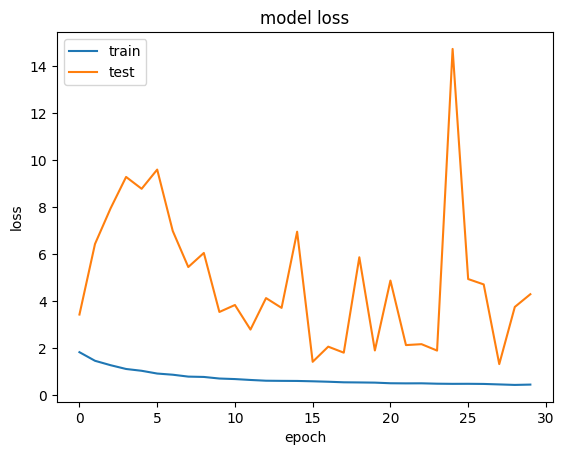

<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [37]:
CNN_model(62,'relu','max',30)

# Find the best Relu Variants

In [38]:
act=['relu','elu','gelu','selu','LeakyReLU']



#### Best activation with max pooling

relu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                 

Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.5847 - accuracy: 0.7792
Epoch 16: val_accuracy improved from 0.47561 to 0.58362, saving model to model_64_relu_max.hdf5
72/72 [==============================] - 18s 252ms/step - loss: 0.5847 - accuracy: 0.7792 - val_loss: 1.0208 - val_accuracy: 0.5836
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.5621 - accuracy: 0.7875
Epoch 17: val_accuracy did not improve from 0.58362
72/72 [==============================] - 18s 246ms/step - loss: 0.5621 - accuracy: 0.7875 - val_loss: 2.9670 - val_accuracy: 0.1760
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.5518 - accuracy: 0.7805
Epoch 18: val_accuracy did not improve from 0.58362
72/72 [==============================] - 19s 257ms/step - loss: 0.5518 - accuracy: 0.7805 - val_loss: 4.0561 - val_accuracy: 0.1463
Epoch 19/25
72/72 [==============================] - ETA: 0s - loss: 0.5400 - accuracy: 0.7909
Epoch 19: val_accuracy i

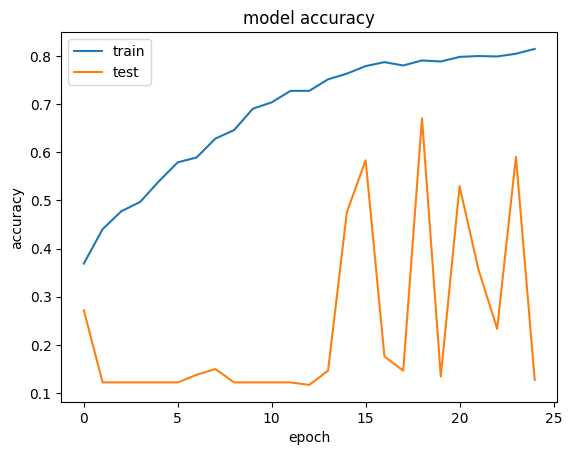

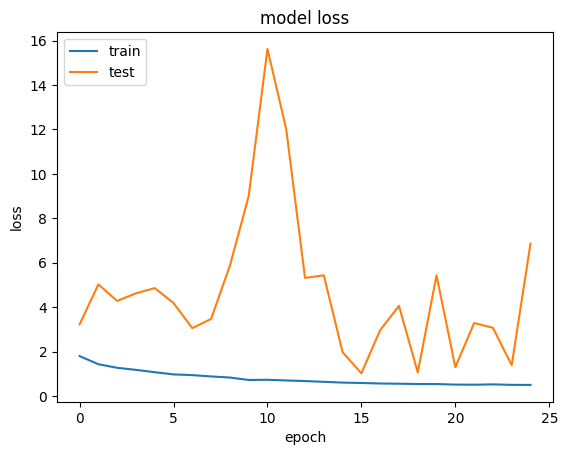

elu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                  

<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)          0         
          

72/72 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.7709
Epoch 19: val_accuracy did not improve from 0.69338
72/72 [==============================] - 20s 281ms/step - loss: 0.5899 - accuracy: 0.7709 - val_loss: 1.7350 - val_accuracy: 0.6098
Epoch 20/25
72/72 [==============================] - ETA: 0s - loss: 0.5598 - accuracy: 0.7792
Epoch 20: val_accuracy did not improve from 0.69338
72/72 [==============================] - 20s 279ms/step - loss: 0.5598 - accuracy: 0.7792 - val_loss: 1.7189 - val_accuracy: 0.4059
Epoch 21/25
72/72 [==============================] - ETA: 0s - loss: 0.5788 - accuracy: 0.7726
Epoch 21: val_accuracy did not improve from 0.69338
72/72 [==============================] - 21s 285ms/step - loss: 0.5788 - accuracy: 0.7726 - val_loss: 1.7026 - val_accuracy: 0.3815
Epoch 22/25
72/72 [==============================] - ETA: 0s - loss: 0.5204 - accuracy: 0.8027
Epoch 22: val_accuracy did not improve from 0.69338
72/72 [=====================

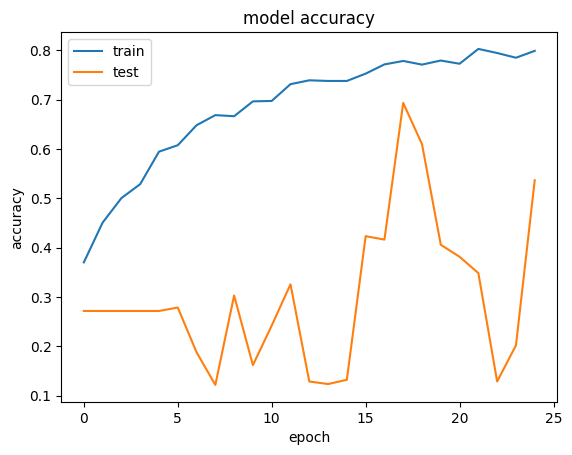

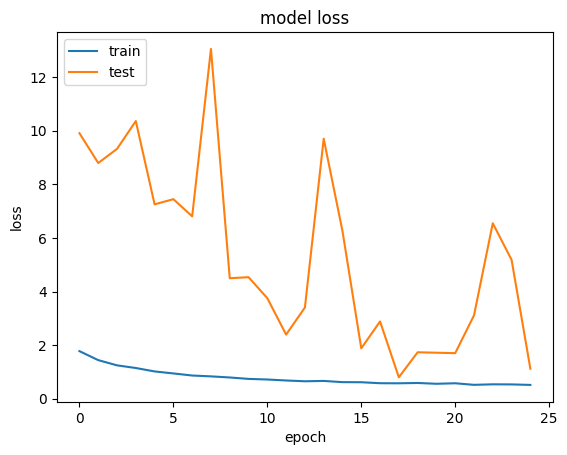

<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_3/conv2d_13/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-39-a8eb58b7f8f7>", line 4, in <module>
      CNN_model(64,i,'max',25)
    File "<ipython-input-36-653d1271906e>", line 83, in CNN_model
      history = model.fit(datagen_preprocessing.flow(x_train,y_train,
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 283, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/usr/local/lib/python3.8/dist-packages/keras/layers/convolutional/base_conv.py", line 255, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_3/conv2d_13/Conv2D'
OOM when allocating tensor with shape[32,64,61,61] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_3/conv2d_13/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_58172]

In [39]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)
    

gelu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

72/72 [==============================] - 31s 424ms/step - loss: 0.6144 - accuracy: 0.7596 - val_loss: 4.0254 - val_accuracy: 0.2038
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.5847 - accuracy: 0.7770
Epoch 16: val_accuracy did not improve from 0.53484
72/72 [==============================] - 31s 420ms/step - loss: 0.5847 - accuracy: 0.7770 - val_loss: 3.6558 - val_accuracy: 0.1864
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.7892
Epoch 17: val_accuracy did not improve from 0.53484
72/72 [==============================] - 31s 423ms/step - loss: 0.5528 - accuracy: 0.7892 - val_loss: 3.9457 - val_accuracy: 0.3206
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7766
Epoch 18: val_accuracy did not improve from 0.53484
72/72 [==============================] - 31s 421ms/step - loss: 0.5782 - accuracy: 0.7766 - val_loss: 7.0101 - val_accuracy: 0.1394
Epoch 19/25
72/72 [============

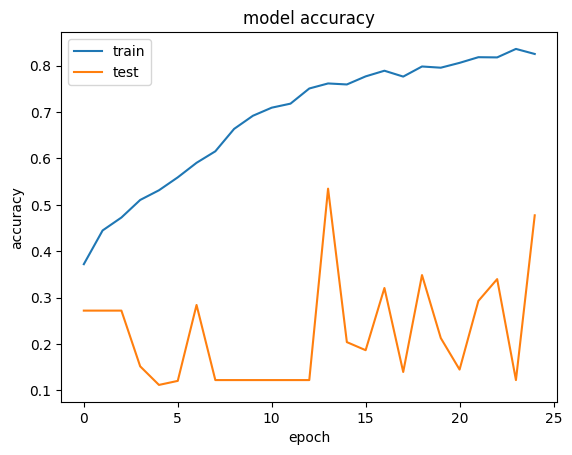

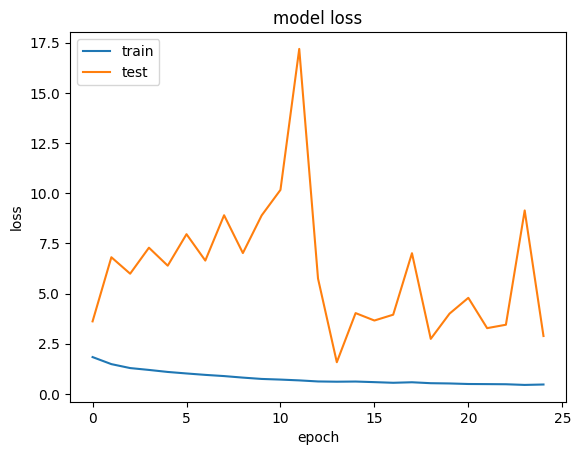

selu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 batch_normalization_39 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_40 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_41 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
          

Epoch 25/25
72/72 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.7888
Epoch 25: val_accuracy did not improve from 0.63415
72/72 [==============================] - 44s 614ms/step - loss: 0.5207 - accuracy: 0.7888 - val_loss: 1.7395 - val_accuracy: 0.4355
Training time: 0:13:58.282788
Test score: 1.2318073511123657
Test accuracy: 0.6341463327407837
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


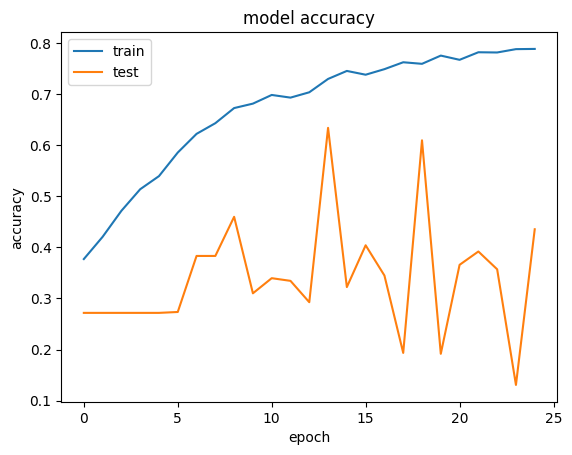

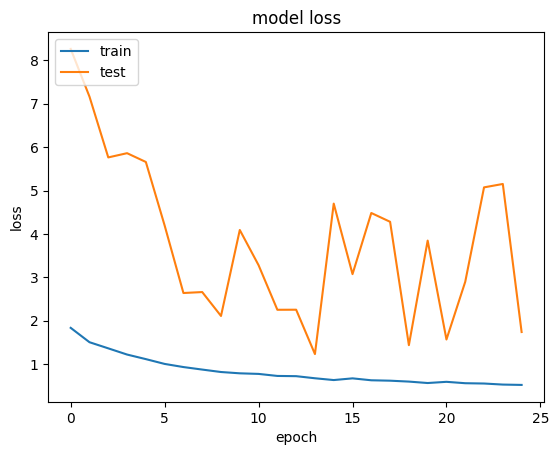

LeakyReLU
Model: "sequential_6"
_________________________________________________________________


<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_43 (Bat  (None, 30, 30, 64)       256       
 chNormali

72/72 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.7504
Epoch 15: val_accuracy did not improve from 0.58885
72/72 [==============================] - 37s 515ms/step - loss: 0.6291 - accuracy: 0.7504 - val_loss: 4.2516 - val_accuracy: 0.1568
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.6065 - accuracy: 0.7761
Epoch 16: val_accuracy did not improve from 0.58885
72/72 [==============================] - 45s 628ms/step - loss: 0.6065 - accuracy: 0.7761 - val_loss: 2.1106 - val_accuracy: 0.5610
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.7722
Epoch 17: val_accuracy did not improve from 0.58885
72/72 [==============================] - 59s 815ms/step - loss: 0.5599 - accuracy: 0.7722 - val_loss: 3.3416 - val_accuracy: 0.1551
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7735
Epoch 18: val_accuracy did not improve from 0.58885
72/72 [=====================

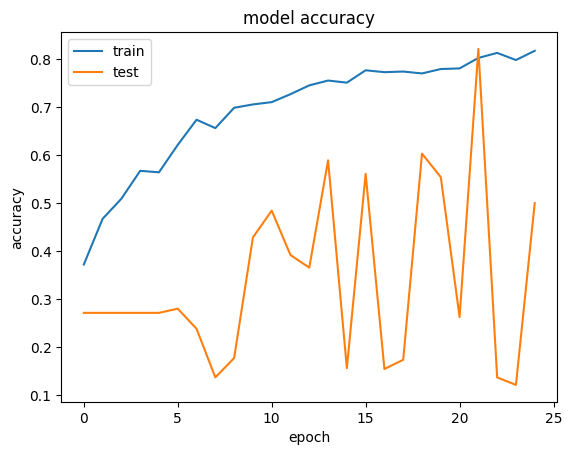

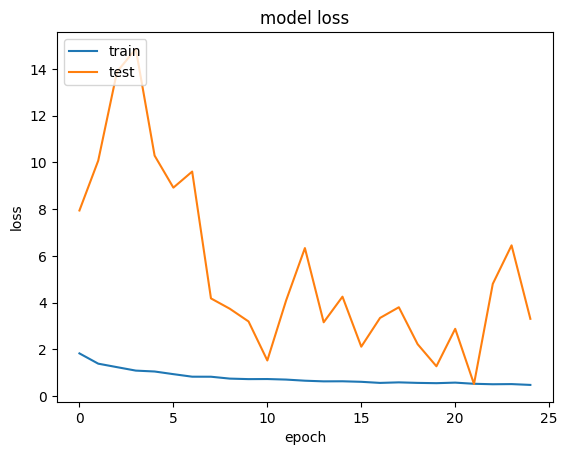

<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [41]:
act2=['gelu','selu','LeakyReLU']

for i in act2:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)

In [44]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.655052
1,relu,64,max,25,0.670732
2,elu,64,max,25,0.693380
3,gelu,64,max,25,0.534843
4,selu,64,max,25,0.634146
5,LeakyReLU,64,max,25,0.820557
6,relu,64,average,25,0.271777
7,elu,64,average,25,0.609756


### Finding best activation function with average pooling

relu
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.6963 - accuracy: 0.7117
Epoch 16: val_accuracy did not improve from 0.27178
Restoring model weights from the end of the best epoch: 1.
72/72 [==============================] - 27s 374ms/step - loss: 0.6963 - accuracy: 0.7117 - val_loss: 2.7693 - val_accuracy: 0.1760
Epoch 16: early stopping
Training time: 0:05:05.308078
Test score: 4.251368999481201
Test accuracy: 0.2717770040035248
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


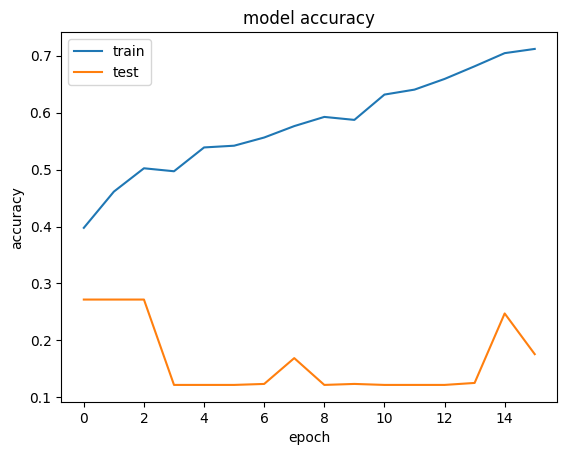

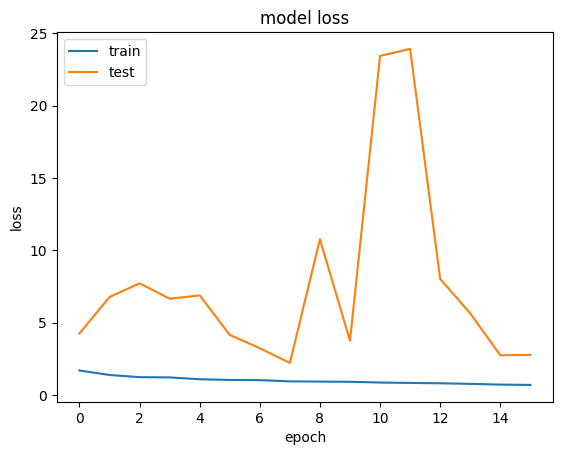

elu
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 126, 126, 64)      1792      


<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_56 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_57 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_34

Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.9061 - accuracy: 0.5971
Epoch 16: val_accuracy did not improve from 0.59408
72/72 [==============================] - 31s 430ms/step - loss: 0.9061 - accuracy: 0.5971 - val_loss: 0.9236 - val_accuracy: 0.5941
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.8943 - accuracy: 0.5980
Epoch 17: val_accuracy did not improve from 0.59408
72/72 [==============================] - 32s 435ms/step - loss: 0.8943 - accuracy: 0.5980 - val_loss: 1.7068 - val_accuracy: 0.3502
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.8833 - accuracy: 0.5967
Epoch 18: val_accuracy did not improve from 0.59408
72/72 [==============================] - 31s 429ms/step - loss: 0.8833 - accuracy: 0.5967 - val_loss: 2.5947 - val_accuracy: 0.2735
Epoch 19/25
72/72 [==============================] - ETA: 0s - loss: 0.8926 - accuracy: 0.5984
Epoch 19: val_accuracy did not improve from 0.59408
72/72 [=========

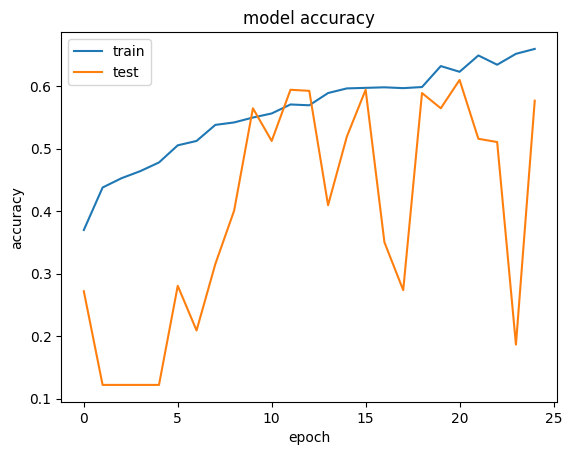

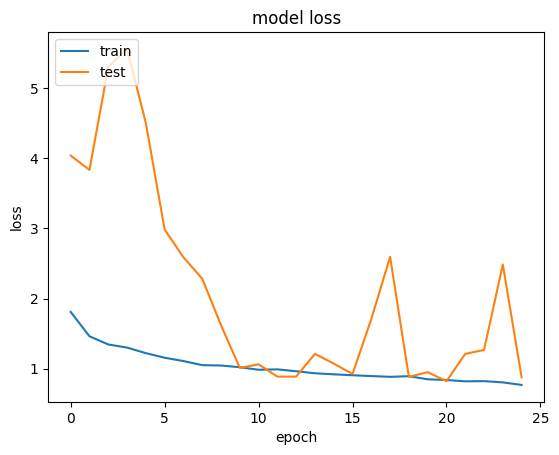

gelu
Model: "sequential_9"


<ipython-input-36-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_63 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_nor

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_9/average_pooling2d_8/AvgPoolGrad' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-43-e8567da5c4f9>", line 4, in <module>
      CNN_model(64,i,'average',25)
    File "<ipython-input-36-653d1271906e>", line 83, in CNN_model
      history = model.fit(datagen_preprocessing.flow(x_train,y_train,
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_9/average_pooling2d_8/AvgPoolGrad'
OOM when allocating tensor with shape[32,126,126,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_9/average_pooling2d_8/AvgPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_146176]

In [43]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

gelu
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                   

72/72 [==============================] - ETA: 0s - loss: 0.8795 - accuracy: 0.6163
Epoch 15: val_accuracy did not improve from 0.61150
72/72 [==============================] - 30s 414ms/step - loss: 0.8795 - accuracy: 0.6163 - val_loss: 2.8475 - val_accuracy: 0.1882
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.8848 - accuracy: 0.6106
Epoch 16: val_accuracy did not improve from 0.61150
72/72 [==============================] - 30s 408ms/step - loss: 0.8848 - accuracy: 0.6106 - val_loss: 1.1750 - val_accuracy: 0.5296
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.8367 - accuracy: 0.6350
Epoch 17: val_accuracy did not improve from 0.61150
72/72 [==============================] - 28s 389ms/step - loss: 0.8367 - accuracy: 0.6350 - val_loss: 1.9615 - val_accuracy: 0.2753
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.8507 - accuracy: 0.6241
Epoch 18: val_accuracy did not improve from 0.61150
72/72 [=====================

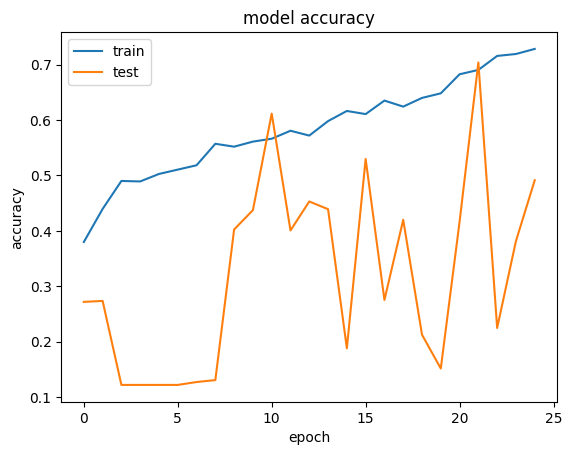

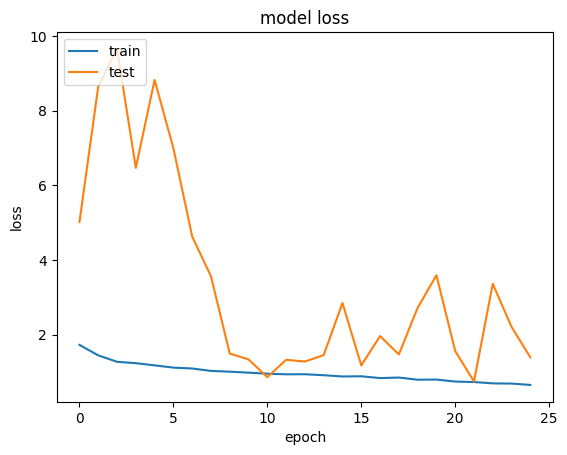

selu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_12 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
          

72/72 [==============================] - ETA: 0s - loss: 0.7849 - accuracy: 0.6664
Epoch 24: val_accuracy did not improve from 0.39895
72/72 [==============================] - 28s 381ms/step - loss: 0.7849 - accuracy: 0.6664 - val_loss: 1.8024 - val_accuracy: 0.2997
Epoch 25/25
72/72 [==============================] - ETA: 0s - loss: 0.7533 - accuracy: 0.6799
Epoch 25: val_accuracy did not improve from 0.39895
72/72 [==============================] - 23s 312ms/step - loss: 0.7533 - accuracy: 0.6799 - val_loss: 3.1659 - val_accuracy: 0.2944
Training time: 0:12:32.517664
Test score: 2.022233486175537
Test accuracy: 0.39895468950271606
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


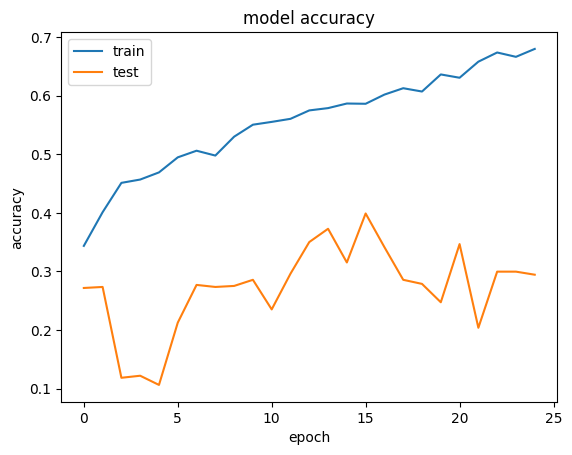

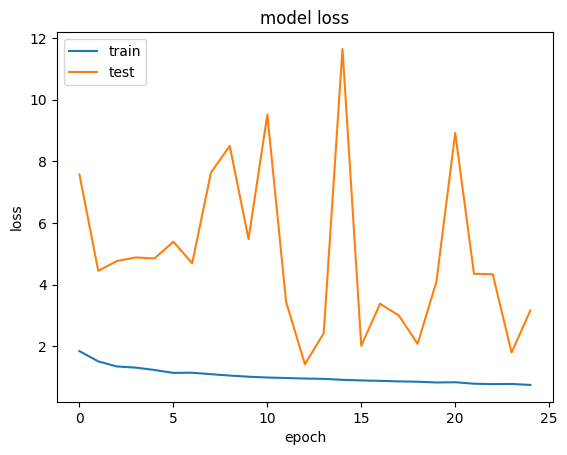

<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


LeakyReLU
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                            

72/72 [==============================] - ETA: 0s - loss: 0.9344 - accuracy: 0.5893
Epoch 15: val_accuracy did not improve from 0.43031
72/72 [==============================] - 31s 430ms/step - loss: 0.9344 - accuracy: 0.5893 - val_loss: 5.4963 - val_accuracy: 0.2944
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.9031 - accuracy: 0.6058
Epoch 16: val_accuracy did not improve from 0.43031
72/72 [==============================] - 28s 387ms/step - loss: 0.9031 - accuracy: 0.6058 - val_loss: 7.1609 - val_accuracy: 0.1150
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.8904 - accuracy: 0.6294
Epoch 17: val_accuracy did not improve from 0.43031
72/72 [==============================] - 38s 528ms/step - loss: 0.8904 - accuracy: 0.6294 - val_loss: 4.0597 - val_accuracy: 0.2979
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.6246
Epoch 18: val_accuracy did not improve from 0.43031
72/72 [=====================

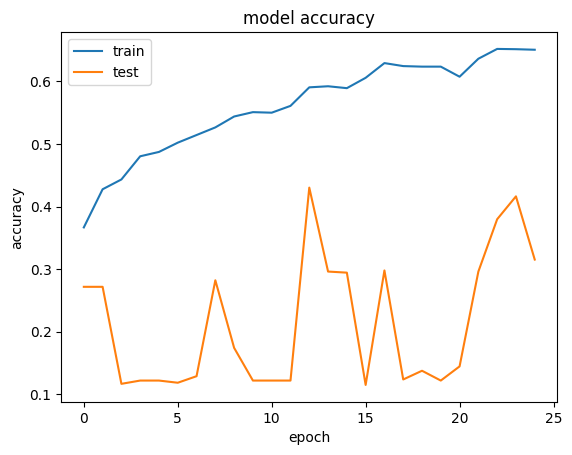

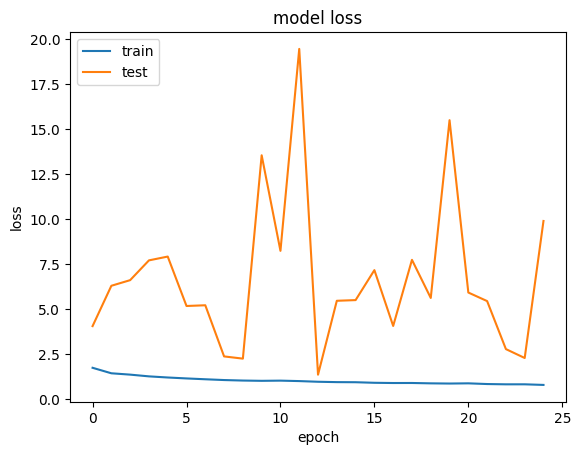

<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [28]:
act2=['gelu','selu','LeakyReLU']

for i in act2:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

In [29]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.655052
1,relu,64,max,25,0.670732
2,elu,64,max,25,0.693380
3,gelu,64,max,25,0.534843
4,selu,64,max,25,0.634146
5,LeakyReLU,64,max,25,0.820557
6,relu,64,average,25,0.271777
7,elu,64,average,25,0.609756
8,gelu,64,average,25,0.703833
9,selu,64,average,25,0.398955


In [30]:
gk = df_r.groupby('pooling').mean()
gk.head()

<ipython-input-30-88fbdc02e871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('pooling').mean()


,number_filters,epochs,test_accuracy
pooling,,,
average,64.000000,25.000000,0.482927
max,63.666667,25.833333,0.668118


In [31]:
gk = df_r.groupby('activation_function').mean()
gk.head()

<ipython-input-31-92edb843cd6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('activation_function').mean()


,number_filters,epochs,test_accuracy
activation_function,,,
LeakyReLU,64.000000,25.000000,0.625436
elu,64.000000,25.000000,0.651568
gelu,64.000000,25.000000,0.619338
relu,63.333333,26.666667,0.532520
selu,64.000000,25.000000,0.516551


## Conclusion regarding the performance of Activation function

seeing all the results elu and gelu seems to give the best results for max and average type poolings, however on average elu gives best result hence we will chose elu for futrther analysis

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results compared overall

## The best activation function is 'ELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                   

72/72 [==============================] - ETA: 0s - loss: 0.7308 - accuracy: 0.7095
Epoch 15: val_accuracy improved from 0.32753 to 0.37979, saving model to model_16_elu_max.hdf5
72/72 [==============================] - 10s 132ms/step - loss: 0.7308 - accuracy: 0.7095 - val_loss: 1.7602 - val_accuracy: 0.3798
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7213
Epoch 16: val_accuracy did not improve from 0.37979
72/72 [==============================] - 9s 119ms/step - loss: 0.7095 - accuracy: 0.7213 - val_loss: 2.3054 - val_accuracy: 0.3606
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.7195
Epoch 17: val_accuracy did not improve from 0.37979
72/72 [==============================] - 9s 116ms/step - loss: 0.6925 - accuracy: 0.7195 - val_loss: 6.7396 - val_accuracy: 0.1202
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.7131 - accuracy: 0.7252
Epoch 18: val_accuracy did not improve 

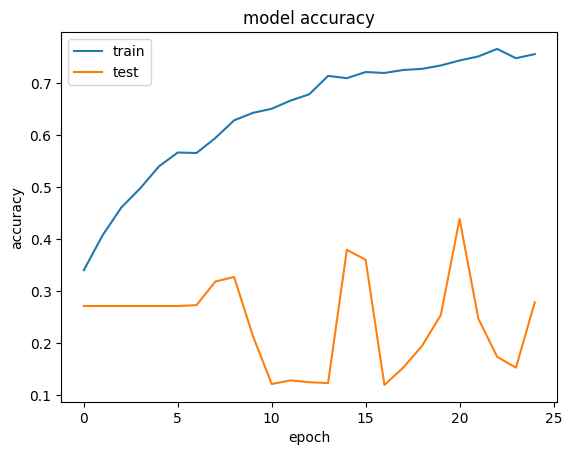

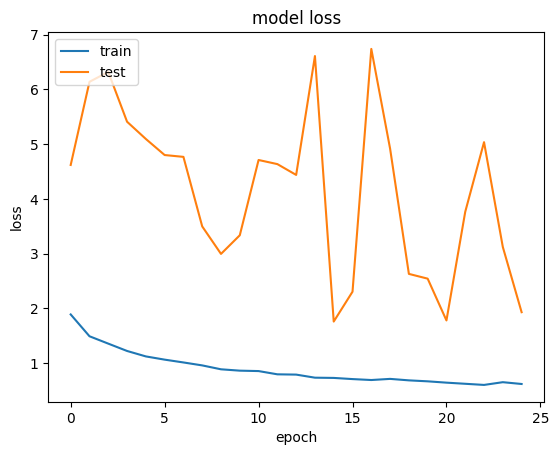

<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                   

Epoch 15/25
72/72 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.7395
Epoch 15: val_accuracy did not improve from 0.61847
72/72 [==============================] - 16s 221ms/step - loss: 0.6642 - accuracy: 0.7395 - val_loss: 3.8171 - val_accuracy: 0.1882
Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.6273 - accuracy: 0.7483
Epoch 16: val_accuracy did not improve from 0.61847
72/72 [==============================] - 20s 269ms/step - loss: 0.6273 - accuracy: 0.7483 - val_loss: 1.2110 - val_accuracy: 0.5557
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.6221 - accuracy: 0.7461
Epoch 17: val_accuracy did not improve from 0.61847
72/72 [==============================] - 21s 283ms/step - loss: 0.6221 - accuracy: 0.7461 - val_loss: 4.3188 - val_accuracy: 0.1341
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.6319 - accuracy: 0.7570
Epoch 18: val_accuracy did not improve from 0.61847
72/72 [=========

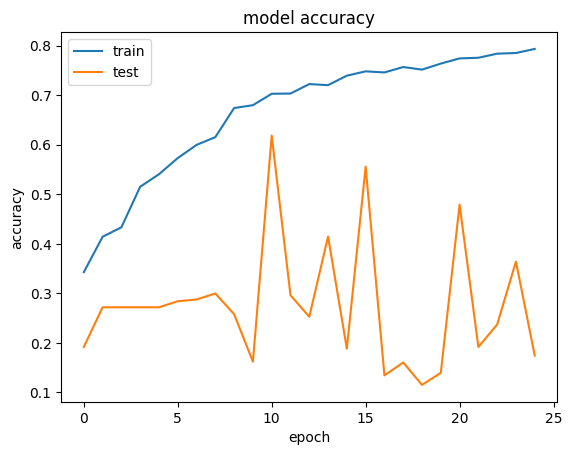

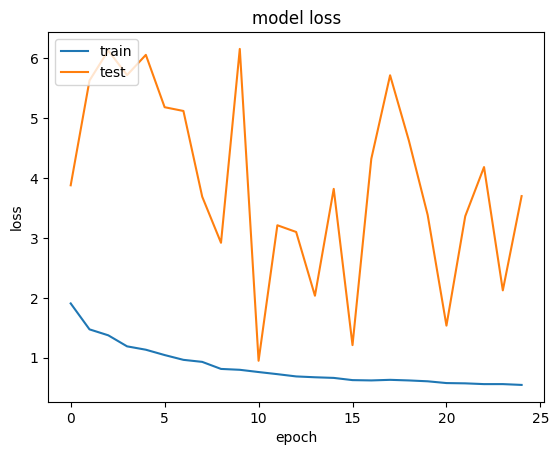

64
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         


<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 2D)                                                             
                                                                 
 batch_normalization_36 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_37 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooli

72/72 [==============================] - 28s 383ms/step - loss: 0.5885 - accuracy: 0.7583 - val_loss: 3.0543 - val_accuracy: 0.1690
Epoch 19/25
72/72 [==============================] - ETA: 0s - loss: 0.5805 - accuracy: 0.7722
Epoch 19: val_accuracy did not improve from 0.62195
72/72 [==============================] - 28s 383ms/step - loss: 0.5805 - accuracy: 0.7722 - val_loss: 3.2593 - val_accuracy: 0.2753
Epoch 20/25
72/72 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.7757
Epoch 20: val_accuracy did not improve from 0.62195
72/72 [==============================] - 27s 370ms/step - loss: 0.5610 - accuracy: 0.7757 - val_loss: 1.3099 - val_accuracy: 0.5209
Epoch 21/25
72/72 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.7861
Epoch 21: val_accuracy did not improve from 0.62195
72/72 [==============================] - 31s 427ms/step - loss: 0.5580 - accuracy: 0.7861 - val_loss: 2.9731 - val_accuracy: 0.2509
Epoch 22/25
72/72 [============

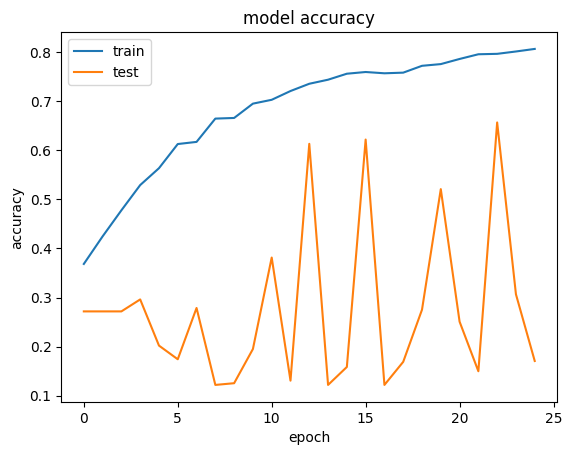

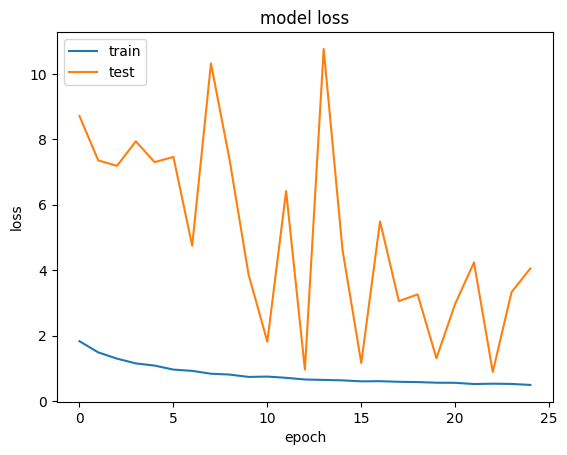

128
Model: "sequential_6"
_________________________________________________________________


<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_43 (Bat  (None, 30, 30, 128)      512       
 chNormali

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_6/max_pooling2d_12/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-32-a9152d31ceba>", line 6, in <module>
      CNN_model(i,'elu','max',25)
    File "<ipython-input-26-653d1271906e>", line 83, in CNN_model
      history = model.fit(datagen_preprocessing.flow(x_train,y_train,
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_6/max_pooling2d_12/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,126,126,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_6/max_pooling2d_12/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_108747]

In [32]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'elu','max',25)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                      

Epoch 16/25
72/72 [==============================] - ETA: 0s - loss: 0.5810 - accuracy: 0.7753
Epoch 16: val_accuracy did not improve from 0.38328
72/72 [==============================] - 77s 1s/step - loss: 0.5810 - accuracy: 0.7753 - val_loss: 5.7607 - val_accuracy: 0.1359
Epoch 17/25
72/72 [==============================] - ETA: 0s - loss: 0.5700 - accuracy: 0.7770
Epoch 17: val_accuracy did not improve from 0.38328
72/72 [==============================] - 72s 1s/step - loss: 0.5700 - accuracy: 0.7770 - val_loss: 5.4869 - val_accuracy: 0.1237
Epoch 18/25
72/72 [==============================] - ETA: 0s - loss: 0.5513 - accuracy: 0.7853
Epoch 18: val_accuracy did not improve from 0.38328
72/72 [==============================] - 64s 893ms/step - loss: 0.5513 - accuracy: 0.7853 - val_loss: 3.1322 - val_accuracy: 0.1359
Epoch 19/25
72/72 [==============================] - ETA: 0s - loss: 0.5289 - accuracy: 0.7927
Epoch 19: val_accuracy did not improve from 0.38328
72/72 [===============

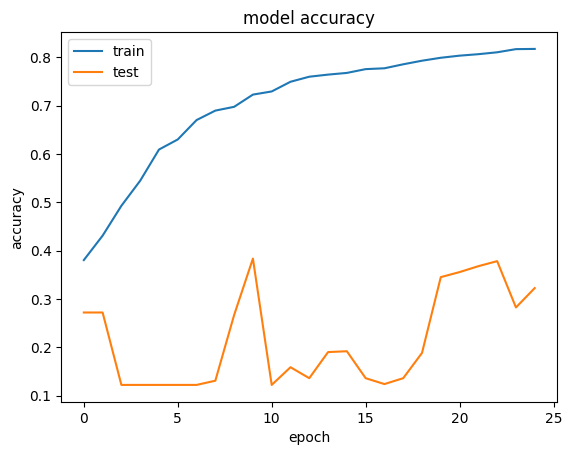

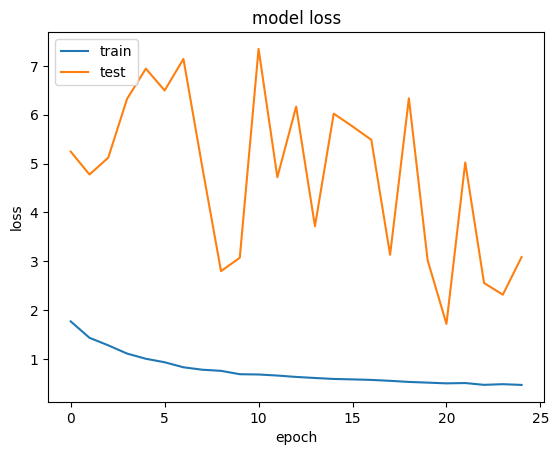

<ipython-input-26-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [34]:
CNN_model(128,'elu','max',25)

In [35]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.655052
1,relu,64,max,25,0.670732
2,elu,64,max,25,0.693380
3,gelu,64,max,25,0.534843
4,selu,64,max,25,0.634146
5,LeakyReLU,64,max,25,0.820557
6,relu,64,average,25,0.271777
7,elu,64,average,25,0.609756
8,gelu,64,average,25,0.703833
9,selu,64,average,25,0.398955


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters. 

### from above results 64 filters give the best results

## the best model is with 'relu' activation function 64 filters and maxpooling can give results from accuracy of 0.65 to 0.69

Saving reults as a csv file

In [36]:
df_results1=df_r.copy()
df_results1['dataset']='Brain Tumor Classification'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,62,max,30,0.655052,Brain Tumor Classification
1,relu,64,max,25,0.670732,Brain Tumor Classification
2,elu,64,max,25,0.693380,Brain Tumor Classification
3,gelu,64,max,25,0.534843,Brain Tumor Classification
4,selu,64,max,25,0.634146,Brain Tumor Classification


In [37]:
df_results1.to_csv('df_results1_d4.csv',index=False)

In [38]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
5,LeakyReLU,64,max,25,0.820557,Brain Tumor Classification
8,gelu,64,average,25,0.703833,Brain Tumor Classification
2,elu,64,max,25,0.693380,Brain Tumor Classification
1,relu,64,max,25,0.670732,Brain Tumor Classification
13,elu,64,max,25,0.656794,Brain Tumor Classification
0,relu,62,max,30,0.655052,Brain Tumor Classification
4,selu,64,max,25,0.634146,Brain Tumor Classification
12,elu,32,max,25,0.618467,Brain Tumor Classification
7,elu,64,average,25,0.609756,Brain Tumor Classification
3,gelu,64,max,25,0.534843,Brain Tumor Classification


the imagenet models were run on kaggle notebooks

# Using imagenet winner model

## Resnet

2022-11-26 06:14:31.303563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 06:14:31.304621: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 06:14:31.305526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 06:14:31.306297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 06:14:31.306981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_____________________________

2022-11-26 06:14:33.944972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-26 06:14:41.066979: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


72/72 [==============================] - 34s 216ms/step - loss: 1.2515 - accuracy: 0.5849 - val_loss: 89.5296 - val_accuracy: 0.3136

Epoch 00001: val_accuracy improved from -inf to 0.31359, saving model to resnet_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
72/72 [==============================] - 13s 174ms/step - loss: 0.7488 - accuracy: 0.7239 - val_loss: 12.5270 - val_accuracy: 0.1359

Epoch 00002: val_accuracy did not improve from 0.31359
Epoch 3/25
72/72 [==============================] - 13s 175ms/step - loss: 0.5089 - accuracy: 0.8149 - val_loss: 1.8571 - val_accuracy: 0.1359

Epoch 00003: val_accuracy did not improve from 0.31359
Epoch 4/25
72/72 [==============================] - 13s 175ms/step - loss: 0.4467 - accuracy: 0.8484 - val_loss: 2.0176 - val_accuracy: 0.1359

Epoch 00004: val_accuracy did not improve from 0.31359
Epoch 5/25
72/72 [==============================] - 13s 182ms/step - loss: 0.4008 - accuracy: 0.8645 - val_loss: 2.7359 - val_accuracy: 0.1359

Epoch 00005: val_accuracy did not improve from 0.31359
Epoch 6/25
72/72 [==============================] - 12s 172ms/step - loss: 0.3864 - accuracy: 0.8689 - val_loss: 4.6025 - val_accuracy: 0.1359

Epoch 00006: val_accuracy did not improve from 0.31359
Epoc

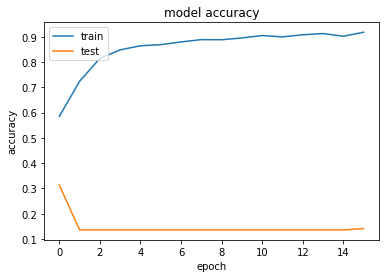

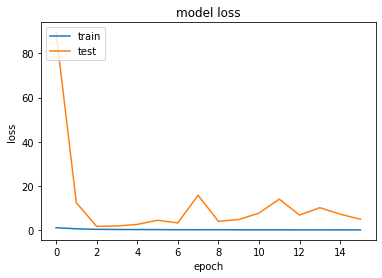

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=num_classes)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=num_classes,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)




print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Inception_V3

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
___________________________

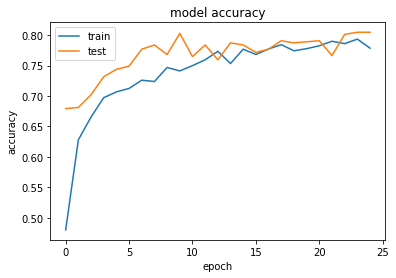

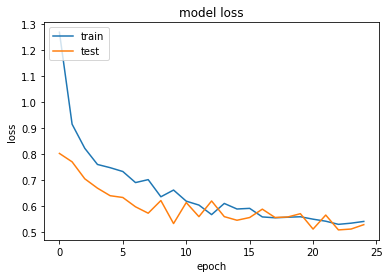

In [ ]:



from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=num_classes, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()



batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])


now = datetime.now
t= now()


es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)




print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5110028386116028
Test accuracy: 0.8048780560493469


# VGG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________________

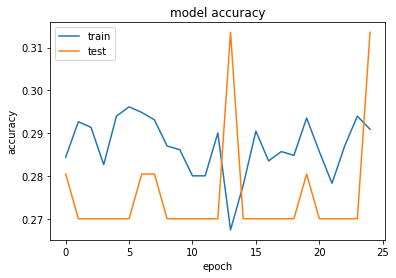

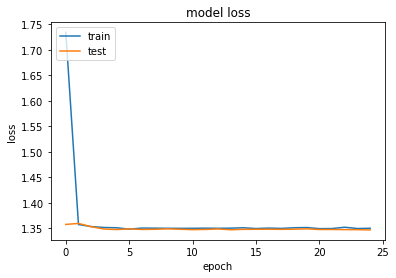

In [ ]:


vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=x_train.shape[1:],classes=58)

x = vgg16.output


x = GlobalAveragePooling2D()(x)

x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)


output = Dense(units=num_classes,activation = 'softmax')(x)
model_vgg16 = Model(vgg16.input, output)
model_vgg16.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_vgg16.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

filepath = 'vgg16_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_vgg16.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)


print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

